# Ejercicio

Dadas dos listas de números del mismo tamaño `x` e `y`, construir las siguientes funciones:

1. Una función para calcular la media de una lista de números.
2. Una función para calcular la varianza de una lista de números.
3. Una función para calcular la covarianza de dos listas de números.
4. Una función para calcular los coeficientes de la recta de regresión de `y` sobre `x`.
5. Una función que devuelva el diagrama de dispersión y la recta de regresión como la que se muestra en el siguiente ejemplo:

```pyhton
x = [1, 2, 3, 4, 5, 6]
y = [20, 18, 12, 10, 9, 9]
```

!['Recta de regresión'](../../img/recta-regresion.png)

Usar las siguientes fórmulas para el cálculo de los estadísticos: $\bar x = \frac{\sum x_i}{n}$, $s^2 = \frac{\sum x_i^2}{n}-\bar{x}^2$, $s_{xy} = \frac{\sum x_iy_j}{n} - \bar{x}\bar{y}$, $b = \frac{s_{xy}}{s_x^2}$ y $a = \bar{y} - b * \bar{x}$.

# Solución

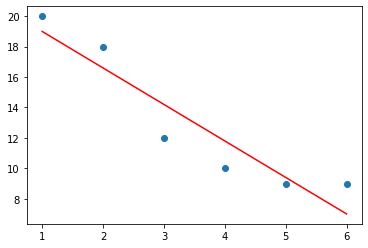

In [1]:
import matplotlib.pyplot as plt

def media(x):
  '''Función que calcula la media de una lista de números.

  Parámetros:
    - x: Es una lista de números.
  
  Salida:
    La media de los números de la lista dada.
  '''
  return sum(x) / len(x)

def varianza(x):
  '''Función que calcula la varianza de una lista de números.

  Parámetros:
    - x: Es una lista de números.
  
  Salida:
    La varianza de los números de la lista dada.
  '''
  # Inicializamos una variable para calcular la suma de los números. 
  suma = 0
  # Bucle para recorrer los números de la lista.
  for i in x:
    # Añadimos el número a la suma parcial.
    suma += i ** 2
  return suma / len(x) - media(x) ** 2

def covarianza(x, y):
  '''Función que calcula la covarianza de dos listas de números.

  Parámetros:
    - x: Es una lista de números.
    - y: Es una lista de números del mismo tamaño que x.
  
  Salida:
    La covarianza de las listas dadas.
  '''
  suma = 0
  # Bucle iterativo para recorrer los números de las listas x e y.
  # i toma como valores los enteros de 0 al tamaño de las listas menos 1.
  for i in range(len(x)):
    suma += x[i] * y[i]
  return suma / len(x) - media(x) * media(y)

def recta_regresion(x, y):
  '''Función que calcula los coeficientes de la recta de regresión de dos listas de números.

  Parámetros:
    - x: Es una lista de números.
    - y: Es una lista de números del mismo tamaño que x.
  
  Salida:
    Una tupla con el término independiente y la pendiente de la recta de regresión de las listas dadas.
  '''
  b = covarianza(x, y) / varianza(x)
  a = media(y) - b * media(x)
  return a, b

def dibuja_recta_regresion(x, y):
  # Inicializamos la figura y un par de ejes.
  fig, ax = plt.subplots()
  # Dibujamos el diagrama de dispersión.
  ax.scatter(x, y)
  # Calculamos los coeficientes de la recta de regresión de y sobre x.
  a, b = recta_regresion(x, y)
  # Dibujamos la recta de regresión a partir de dos puntos (el mínimo y el máximo de x)
  ax.plot([min(x), max(x)], [a + b * min(x), a + b * max(x)], color = 'red')
  return ax

x = [1, 2, 3, 4, 5, 6]
y = [20, 18, 12, 10, 9, 9]
dibuja_recta_regresion(x, y)
plt.savefig('recta-regresion.png')
